In [1740]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

### 0. 데이터 로딩 및 확인

In [1741]:
#utf-8-sig -> euc-kr -> cp949
lemon = pd.read_csv('data/lemon.csv', encoding='euc-kr', index_col='ID')
lemon.head()

,lemon,구매일자,판매처,연식,차량연령,제조사,모델명,트림,세부모델명,색상,...,현재평균상태소매가격,현재평균이상상태소매가격,프리미엄여부,차량보증,구매자ID,구매지우편번호,구매주,취득비용,온라인판매여부,보증금액
ID,,,,,,,,,,,,,,,,,,,,,
1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [1742]:
#lemon.info()

In [1743]:
col = ['휠타입ID']
lemon = lemon.drop(columns=col)
lemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lemon           72983 non-null  int64  
 1   구매일자            72983 non-null  object 
 2   판매처             72983 non-null  object 
 3   연식              72983 non-null  int64  
 4   차량연령            72983 non-null  int64  
 5   제조사             72983 non-null  object 
 6   모델명             72983 non-null  object 
 7   트림              70623 non-null  object 
 8   세부모델명           72975 non-null  object 
 9   색상              72975 non-null  object 
 10  변속기             72974 non-null  object 
 11  휠타입명            69809 non-null  object 
 12  운행거리            72983 non-null  int64  
 13  생산국가            72978 non-null  object 
 14  차량크기            72978 non-null  object 
 15  미국제조사명          72978 non-null  object 
 16  구매당시평균상태차량가격    72965 non-null  float64
 17  구매당시평균이상상태차량가격  72965 non-null 

### 1. 데이터 타입 조정

In [1744]:
lemon['구매일자']

ID
1        12/7/2009
2        12/7/2009
3        12/7/2009
4        12/7/2009
5        12/7/2009
           ...    
73010    12/2/2009
73011    12/2/2009
73012    12/2/2009
73013    12/2/2009
73014    12/2/2009
Name: 구매일자, Length: 72983, dtype: object

In [1745]:
lemon.구매일자 = pd.to_datetime(lemon.구매일자)
lemon['구매년'] = pd.to_datetime(lemon['구매일자']).dt.year
lemon['구매월'] = pd.to_datetime(lemon['구매일자']).dt.month
lemon['구매분기'] = pd.to_datetime(lemon['구매일자']).dt.quarter
lemon['구매일자'] = pd.to_datetime(lemon['구매일자']).dt.day

lemon.구매자ID = 'UID'+lemon.구매자ID.astype('str') #id는 범주
lemon.구매지우편번호 = 'ZIP'+lemon.구매지우편번호.astype('str') #우편번호는 범주
lemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lemon           72983 non-null  int64  
 1   구매일자            72983 non-null  int64  
 2   판매처             72983 non-null  object 
 3   연식              72983 non-null  int64  
 4   차량연령            72983 non-null  int64  
 5   제조사             72983 non-null  object 
 6   모델명             72983 non-null  object 
 7   트림              70623 non-null  object 
 8   세부모델명           72975 non-null  object 
 9   색상              72975 non-null  object 
 10  변속기             72974 non-null  object 
 11  휠타입명            69809 non-null  object 
 12  운행거리            72983 non-null  int64  
 13  생산국가            72978 non-null  object 
 14  차량크기            72978 non-null  object 
 15  미국제조사명          72978 non-null  object 
 16  구매당시평균상태차량가격    72965 non-null  float64
 17  구매당시평균이상상태차량가격  72965 non-null 

In [1746]:
lemon['구매년']

ID
1        2009
2        2009
3        2009
4        2009
5        2009
         ... 
73010    2009
73011    2009
73012    2009
73013    2009
73014    2009
Name: 구매년, Length: 72983, dtype: int64

In [1747]:
lemon['차량연령']

ID
1        3
2        5
3        4
4        5
5        4
        ..
73010    8
73011    2
73012    4
73013    3
73014    3
Name: 차량연령, Length: 72983, dtype: int64

In [1748]:
lemon_cat = lemon.select_dtypes(['object'])
#lemon_cat.info()

In [1749]:
lemon = lemon.select_dtypes(['number','datetime'])
#lemon.info()

### 2. 범주형변수처리

In [1750]:
lemon_cat.nunique()

판매처           3
제조사          33
모델명        1063
트림          134
세부모델명       863
색상           16
변속기           3
휠타입명          3
생산국가          4
차량크기         12
미국제조사명        4
프리미엄여부        2
차량보증          2
구매자ID        74
구매지우편번호     153
구매주          37
dtype: int64

In [1751]:
col = ['트림','세부모델명','구매주']
lemon_cat = lemon_cat.drop(columns=col)
lemon_cat.nunique()

판매처           3
제조사          33
모델명        1063
색상           16
변속기           3
휠타입명          3
생산국가          4
차량크기         12
미국제조사명        4
프리미엄여부        2
차량보증          2
구매자ID        74
구매지우편번호     153
dtype: int64

In [1752]:
lemon_cat.isnull().sum()

판매처            0
제조사            0
모델명            0
색상             8
변속기            9
휠타입명        3174
생산국가           5
차량크기           5
미국제조사명         5
프리미엄여부     69564
차량보증       69564
구매자ID          0
구매지우편번호        0
dtype: int64

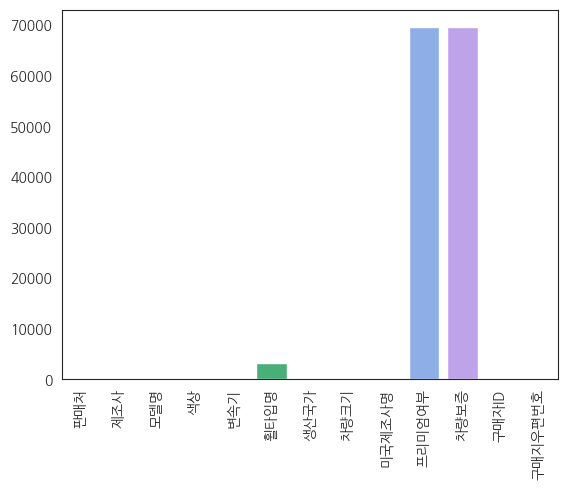

In [1753]:
sns.barplot(x=lemon_cat.columns, y=lemon_cat.isnull().sum())
plt.xticks(rotation=90);

In [1754]:
lemon_cat = lemon_cat.fillna('OTHERS')
lemon_cat.isnull().sum()

판매처        0
제조사        0
모델명        0
색상         0
변속기        0
휠타입명       0
생산국가       0
차량크기       0
미국제조사명     0
프리미엄여부     0
차량보증       0
구매자ID      0
구매지우편번호    0
dtype: int64

#### 2.1. 범주형 변수 시각화

In [1755]:
graph_cols = list(lemon_cat.columns[(lemon_cat.nunique()<20).values])
graph_cols

['판매처', '색상', '변속기', '휠타입명', '생산국가', '차량크기', '미국제조사명', '프리미엄여부', '차량보증']

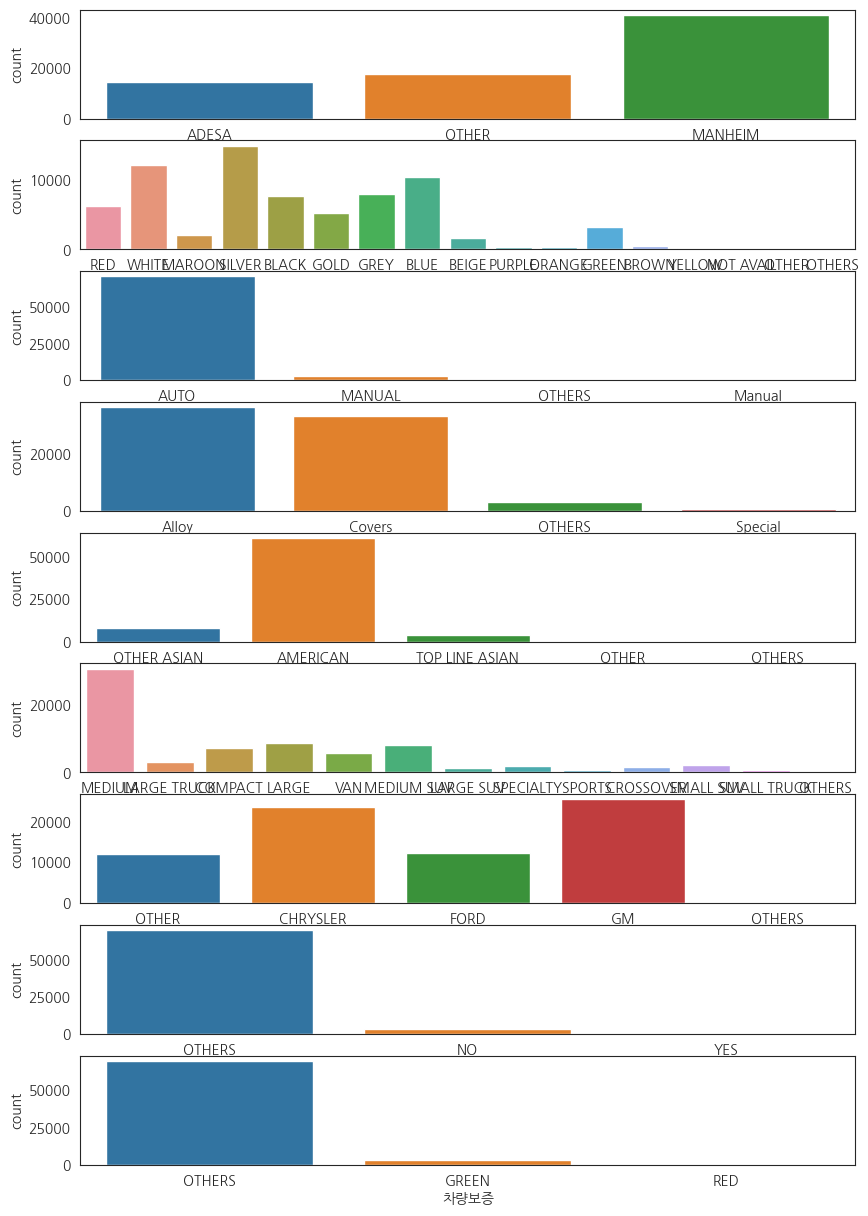

In [1756]:
fig, ax = plt.subplots(nrows=len(graph_cols), ncols=1, figsize=(10,15))
for i, a in zip(graph_cols, ax):
    sns.countplot(x=i, data=lemon_cat, ax=a)

#색상 grey, black, white 무채색 // 나머지색 유채색 -> 범주를 줄이는게 좋음
#변속기 auto 여부 // 나머지는 오토 아님
#휠타입 others 그대로 두기
#생산국가 -> other 다 합치기
#미국 제조사명 -> others, other 합치기
#프리미엄 여부 others -> no로
#차량보증 others 그대로

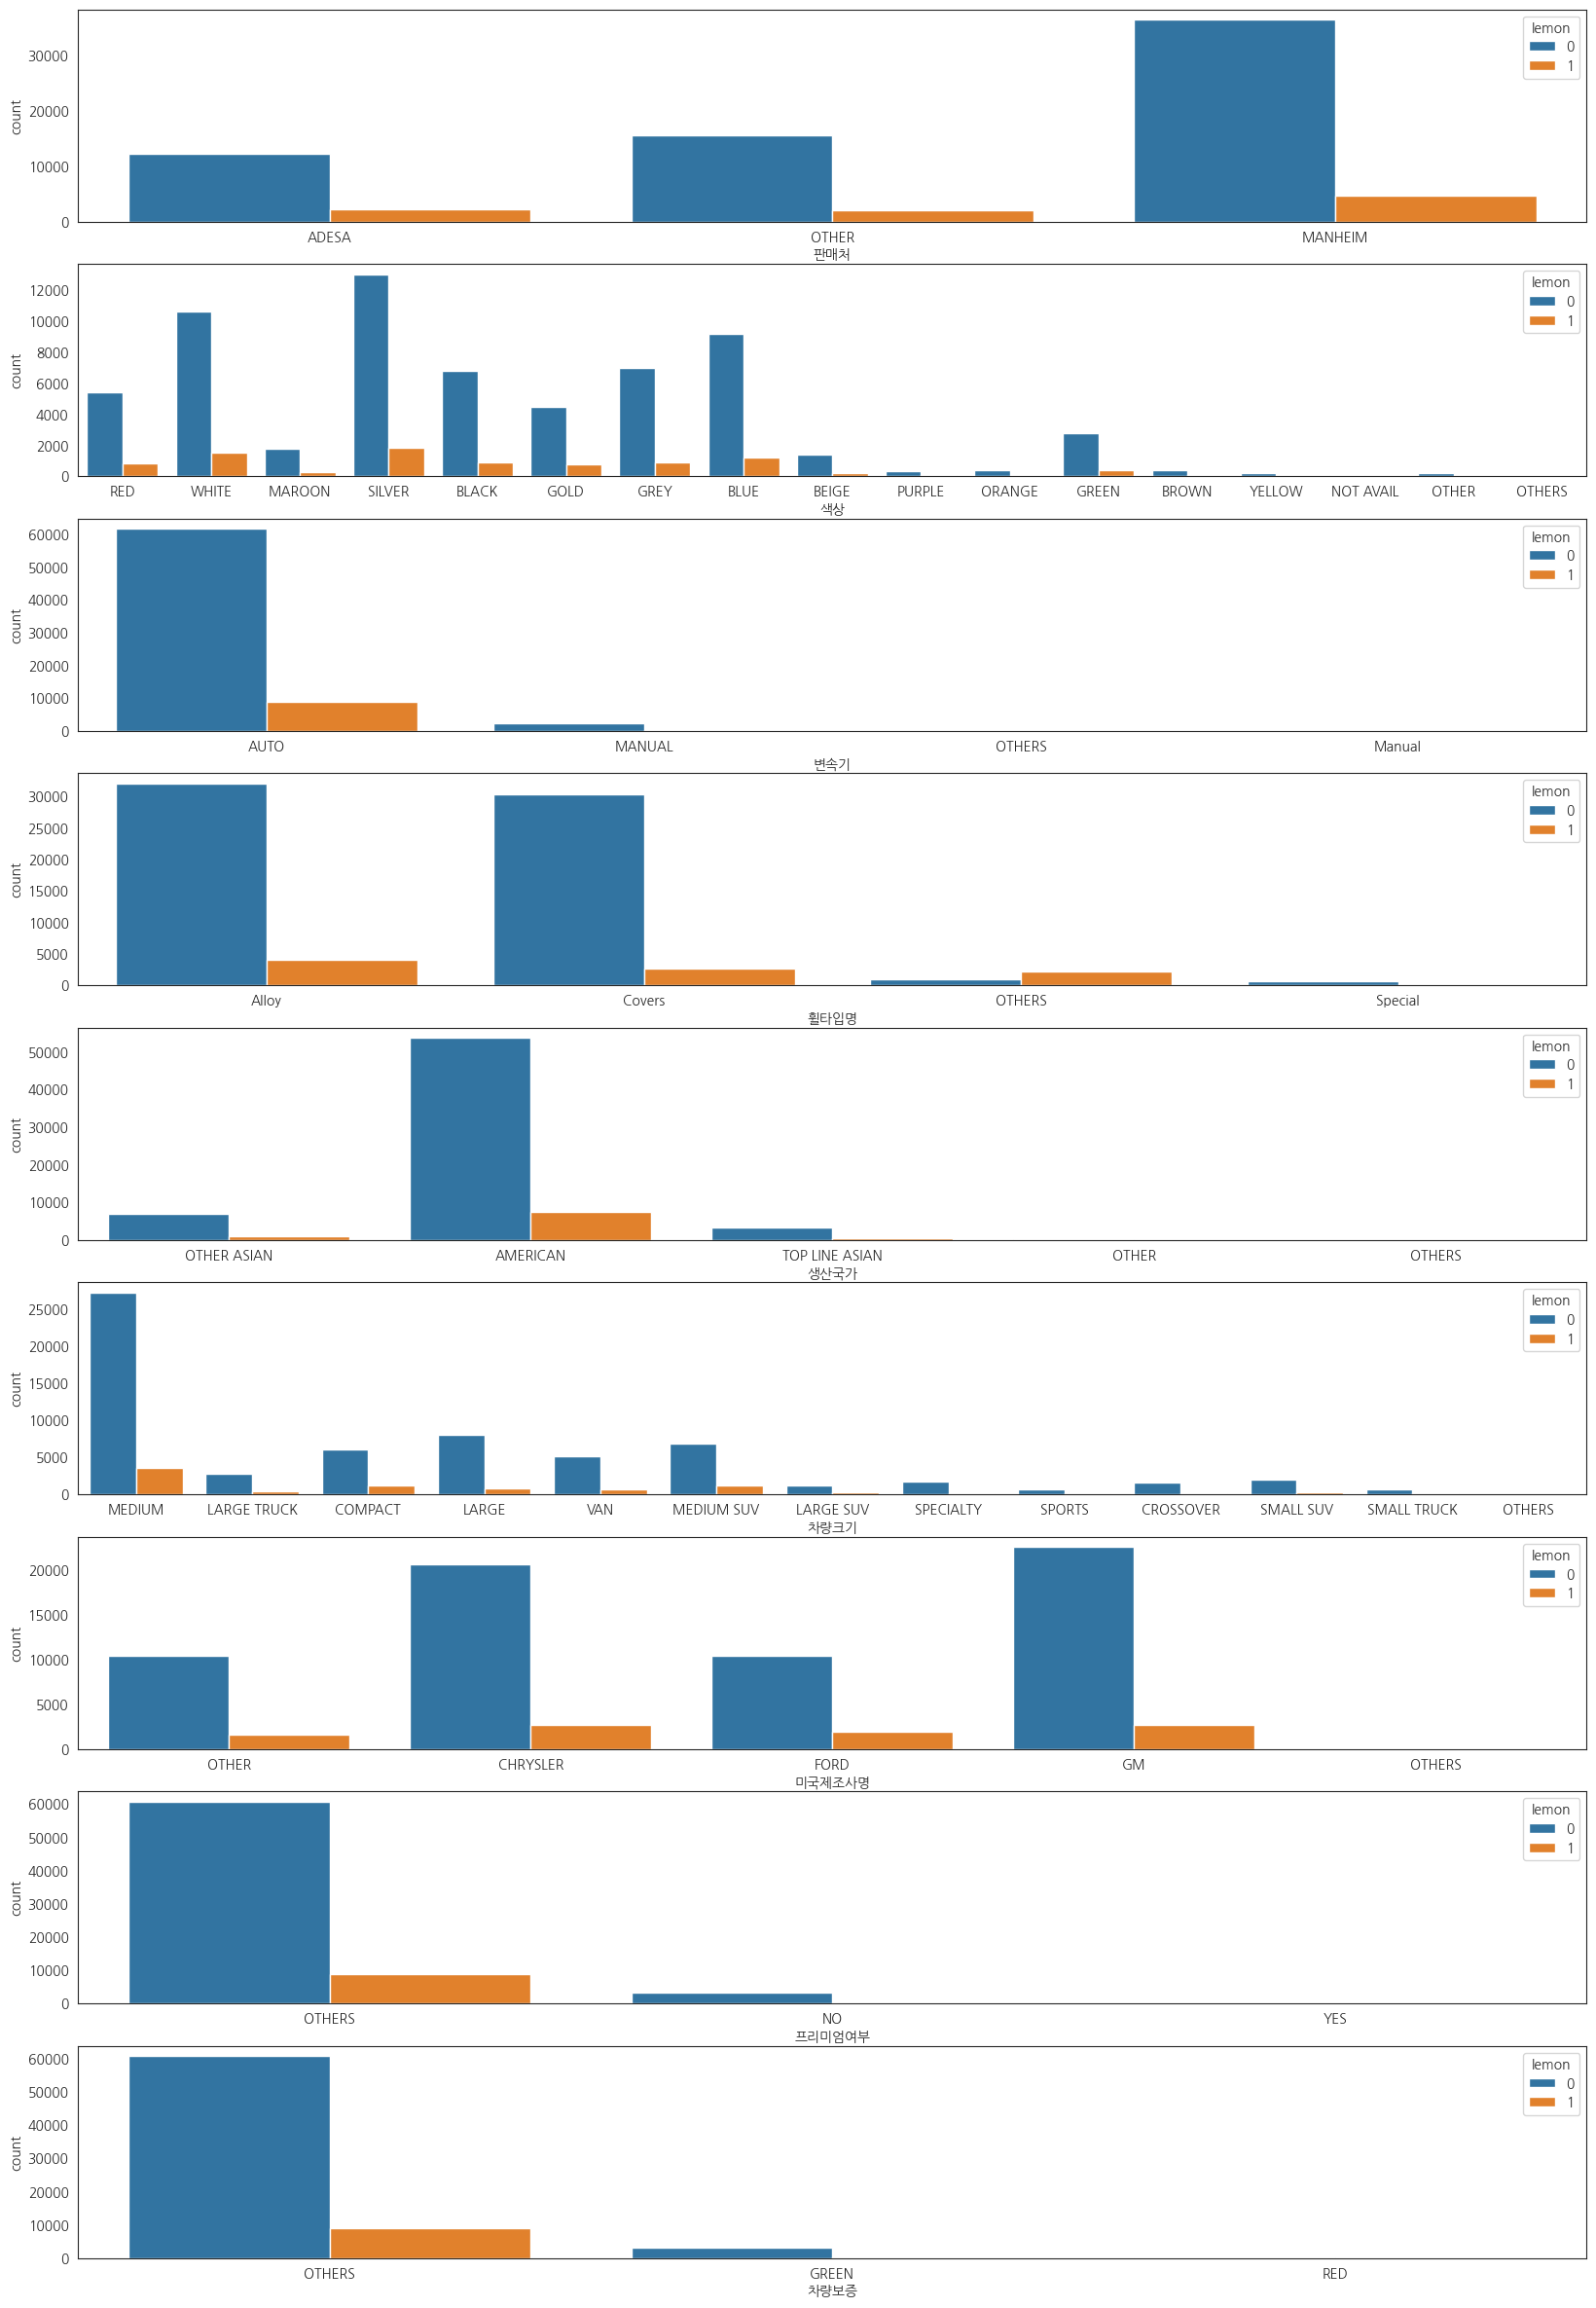

In [1757]:
fig, ax = plt.subplots(nrows=len(graph_cols), ncols=1, figsize=(20,30))
for i, a in zip(graph_cols, ax):
    sns.countplot(x=i, data=lemon_cat, hue=lemon['lemon'], ax=a)

#판매처 레몬 여부로 쓰기 좋음
#색상 grey, black, white 무채색 // 나머지색 유채색 -> 범주를 줄이는게 좋음
#변속기 auto 여부 // 나머지는 오토 아님
#휠타입 others 그대로 두기
#생산국가 -> other 다 합치기
#미국 제조사명 -> others, other 합치기
#프리미엄 여부 others -> no로
#차량보증 others 그대로

#### 2.2. 범주형 변수 수치화

In [1758]:
lemon_cat.nunique()

판매처           3
제조사          33
모델명        1063
색상           17
변속기           4
휠타입명          4
생산국가          5
차량크기         13
미국제조사명        5
프리미엄여부        3
차량보증          3
구매자ID        74
구매지우편번호     153
dtype: int64

In [1759]:
# - 기본 원-핫
# - 10개 이상 바이너리 encoding
# - 너무 많으면 mean encoding

#====================================

# - 판매처 : 원-핫인코딩
# - 휠타입명 : 원-핫인코딩
# - 생산국가 : OTHER, OTHERS -> OTHER ASIAN으로 변경 후 원-핫인코딩
# - 프리미엄여부 : 원-핫인코딩
# - 차량보증 : 원-핫인코딩

# - 제조사 : 바이너리인코딩
# - 차량크기 : 바이너리인코딩

# - 색상 : 이진변환(무채색여부)
# - 변속기 : 이진변환(Auto여부)

# - 모델명 : Mean Encoding (너무 많아서)
# - 구매자ID : Mean Encoding
# - 구매지우편번호 : Mean Encoding

#원핫인코딩

In [1760]:
# - 판매처 : 원-핫인코딩
# - 휠타입명 : 원-핫인코딩
# - 생산국가 : OTHER, OTHERS -> OTHER ASIAN으로 변경 후 원-핫인코딩
# - 프리미엄여부 : 원-핫인코딩
# - 차량보증 : 원-핫인코딩

#판매처
lemon_cat['판매처'].unique()
lemon['ADESA'] = (lemon_cat['판매처'].str.split(expand=True)[0] == 'ADESA').astype('int')
lemon['OTHER'] = (lemon_cat['판매처'].str.split(expand=True)[0] == 'OTHER').astype('int')
lemon['MANHEIM'] = (lemon_cat['판매처'].str.split(expand=True)[0] == 'MANHEIM').astype('int')


In [1761]:
#휠타입명
lemon_cat['휠타입명'].unique()
lemon['Alloy'] = (lemon_cat['휠타입명'].str.split(expand=True)[0] == 'Alloy').astype('int')
lemon['Covers'] = (lemon_cat['휠타입명'].str.split(expand=True)[0] == 'Covers').astype('int')
lemon['OTHERS'] = (lemon_cat['휠타입명'].str.split(expand=True)[0] == 'OTHERS').astype('int')
lemon['Special'] = (lemon_cat['휠타입명'].str.split(expand=True)[0] == 'Special').astype('int')

In [1762]:
#생산국가
# lemon_cat['생산국가'].unique()
lemon['AMERICAN'] = (lemon_cat['생산국가'].str.split(expand=True)[0] == 'AMERICAN').astype('int')
lemon['TOP LINE ASIAN'] = (lemon_cat['생산국가'].str.split(expand=True)[0] == 'TOP LINE ASIAN').astype('int')
lemon['OTHER ASIAN'] = (lemon_cat['생산국가'].str.split(expand=True)[0] == 'OTHER ASIAN').astype('int')
lemon['OTHER ASIAN'] = (lemon_cat['생산국가'].str.split(expand=True)[0] == 'OTHER').astype('int')
lemon['OTHER ASIAN'] = (lemon_cat['생산국가'].str.split(expand=True)[0] == 'OTHERS').astype('int')

In [1763]:
#프리미엄여부 : 원-핫인코딩
lemon_cat['프리미엄여부'].unique()
lemon['OTHERS'] = (lemon_cat['프리미엄여부'].str.split(expand=True)[0] == 'OTHERS').astype('int')
lemon['NO'] = (lemon_cat['프리미엄여부'].str.split(expand=True)[0] == 'NO').astype('int')
lemon['YES'] = (lemon_cat['프리미엄여부'].str.split(expand=True)[0] == 'YES').astype('int')

In [1764]:
# - 차량보증 : 원-핫인코딩
lemon_cat['차량보증'].unique()
lemon['OTHERS'] = (lemon_cat['생산국가'].str.split(expand=True)[0] == 'OTHERS').astype('int')
lemon['GREEN'] = (lemon_cat['생산국가'].str.split(expand=True)[0] == 'GREEN').astype('int')
lemon['RED'] = (lemon_cat['생산국가'].str.split(expand=True)[0] == 'RED').astype('int')

#### 바이너리인코딩 예제

In [1765]:
bin(33)

'0b100001'

In [1766]:
제조사_bin = ['%06d' % int(bin(i)[2:]) for i in pd.Categorical(lemon_cat.제조사).codes]
제조사_bin = pd.DataFrame([list(i) for i in 제조사_bin], columns = ['제조사_bin%02d' % (i+1) for i in range(6)], index=lemon.index).astype('int')
lemon = lemon.join(제조사_bin)
#lemon.info()

In [1767]:
bin(13)

'0b1101'

In [1768]:
# 차량크기_bin = ['%04d' % int(bin(i)[2:]) for i in pd.Categorical(lemon_cat.차량크기).codes]
# 차량크기_bin = pd.DataFrame([list(i) for i in 차량크기_bin], columns = ['차량크기_bin%02d' % (i+1) for i in range(4)], index=lemon.index).astype('int')
# lemon = lemon.join(차량크기_bin)
# #lemon.info()

#### Mean Encoding 예제 1: 기본 Encoding

In [1769]:
lemon_cat = lemon_cat.join(lemon['lemon'])
#lemon_cat.info()

In [1770]:
lemon_cat.groupby('모델명')['lemon'].mean()

모델명
1500 RAM PICKUP 2WD     0.116258
1500 RAM PICKUP 4WD     0.105263
1500 SIERRA PICKUP 2    0.083333
1500 SIERRA PICKUP 4    0.000000
1500 SILVERADO PICKU    0.090604
                          ...   
YUKON XL 1500 4WD       0.200000
YUKON XL 1500 4WD 5.    0.500000
YUKON XL 1500 AWD 6.    0.000000
ZEPHYR                  0.111111
ZEPHYR 3.0L V6 SFI      0.500000
Name: lemon, Length: 1063, dtype: float64

In [1771]:
lemon['모델명'] = lemon_cat['모델명'].map(lemon_cat.groupby('모델명')['lemon'].mean())

In [1772]:
lemon['모델명']

ID
1        0.084158
2        0.116258
3        0.097606
4        0.234043
5        0.171617
           ...   
73010    0.185792
73011    0.061224
73012    0.145985
73013    0.079899
73014    0.187726
Name: 모델명, Length: 72983, dtype: float64

In [1773]:
#lemon.info()

#### Mean Encoding 예제 2: Smoothing

In [1774]:
n_size = lemon_cat.groupby('모델명').size()
global_mean = lemon.lemon.mean()
alpha = 0.9 # alpha값이 크면 클수록 smooth -> 평균에 가깝게

def smoothing(n_rows, target_mean):
    return (target_mean*n_rows + global_mean*alpha) / (n_rows + alpha)

lemon['모델명'] = lemon_cat['모델명'].map(lemon_cat.apply(lambda x: smoothing(n_size, lemon_cat.groupby('모델명')['lemon'].mean()))['모델명'])

In [1775]:
# - 모델명 : Mean Encoding (너무 많아서)
# - 구매자ID : Mean Encoding
# - 구매지우편번호 : Mean Encoding

n_size = lemon_cat.groupby('구매자ID').size()
global_mean = lemon.lemon.mean()
alpha = 0.9 # alpha값이 크면 클수록 smooth -> 평균에 가깝게

def smoothing(n_rows, target_mean):
    return (target_mean*n_rows + global_mean*alpha) / (n_rows + alpha)

lemon['구매자ID'] = lemon_cat['구매자ID'].map(lemon_cat.apply(lambda x: smoothing(n_size, lemon_cat.groupby('구매자ID')['lemon'].mean()))['구매자ID'])

In [1776]:
n_size = lemon_cat.groupby('구매지우편번호').size()
global_mean = lemon.lemon.mean()
alpha = 0.9 # alpha값이 크면 클수록 smooth -> 평균에 가깝게

def smoothing(n_rows, target_mean):
    return (target_mean*n_rows + global_mean*alpha) / (n_rows + alpha)

lemon['구매지우편번호'] = lemon_cat['구매지우편번호'].map(lemon_cat.apply(lambda x: smoothing(n_size, lemon_cat.groupby('구매지우편번호')['lemon'].mean()))['구매지우편번호'])

In [1777]:
#lemon.info()

#### 이진변환

In [1778]:
non_col = ['WHITE','GREY','BLACK','SILVER']
lemon['무채색여부'] = lemon_cat.색상.isin(non_col).astype('int')
#lemon.info()

In [1779]:
# - 변속기 : 이진변환(Auto여부)
non_col = ['AUTO']
lemon['Auto여부'] = lemon_cat.변속기.isin(non_col).astype('int')
lemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lemon           72983 non-null  int64  
 1   구매일자            72983 non-null  int64  
 2   연식              72983 non-null  int64  
 3   차량연령            72983 non-null  int64  
 4   운행거리            72983 non-null  int64  
 5   구매당시평균상태차량가격    72965 non-null  float64
 6   구매당시평균이상상태차량가격  72965 non-null  float64
 7   구매당시평균상태소매가격    72965 non-null  float64
 8   구매당시평균이상상태소매가격  72965 non-null  float64
 9   현재평균상태가격        72668 non-null  float64
 10  현재평균이상상태가격      72668 non-null  float64
 11  현재평균상태소매가격      72668 non-null  float64
 12  현재평균이상상태소매가격    72668 non-null  float64
 13  취득비용            72983 non-null  float64
 14  온라인판매여부         72983 non-null  int64  
 15  보증금액            72983 non-null  int64  
 16  구매년             72983 non-null  int64  
 17  구매월             72983 non-null 

### 3. 수치형변수의 처리 및 확인

In [1780]:
#연식, 연령 비슷해서 하나 없애기
#구매당시랑 현재랑 똑같이 생겨서 그냥 중요도 높은 평균만썼음
#'구매당시평균상태차량가격', '구매당시평균이상상태차량가격', '구매당시평균상태소매가격', '구매당시평균이상상태소매가격'
cols = ['연식']
lemon = lemon.drop(columns=cols)

In [1781]:
lemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lemon           72983 non-null  int64  
 1   구매일자            72983 non-null  int64  
 2   차량연령            72983 non-null  int64  
 3   운행거리            72983 non-null  int64  
 4   구매당시평균상태차량가격    72965 non-null  float64
 5   구매당시평균이상상태차량가격  72965 non-null  float64
 6   구매당시평균상태소매가격    72965 non-null  float64
 7   구매당시평균이상상태소매가격  72965 non-null  float64
 8   현재평균상태가격        72668 non-null  float64
 9   현재평균이상상태가격      72668 non-null  float64
 10  현재평균상태소매가격      72668 non-null  float64
 11  현재평균이상상태소매가격    72668 non-null  float64
 12  취득비용            72983 non-null  float64
 13  온라인판매여부         72983 non-null  int64  
 14  보증금액            72983 non-null  int64  
 15  구매년             72983 non-null  int64  
 16  구매월             72983 non-null  int64  
 17  구매분기            72983 non-null 

In [1782]:
#결측치 처리
lemon['구매당시평균상태차량가격'] = lemon['구매당시평균상태차량가격'].fillna(lemon['구매당시평균상태차량가격'].median())
lemon['구매당시평균이상상태차량가격'] = lemon['구매당시평균이상상태차량가격'].fillna(lemon['구매당시평균이상상태차량가격'].median())
lemon['구매당시평균상태소매가격'] = lemon['구매당시평균상태소매가격'].fillna(lemon['구매당시평균상태소매가격'].median())
lemon['구매당시평균이상상태소매가격'] = lemon['구매당시평균이상상태소매가격'].fillna(lemon['구매당시평균이상상태소매가격'].median()) 
lemon['현재평균상태가격'] = lemon['현재평균상태가격'].fillna(lemon['현재평균상태가격'].median())
lemon['현재평균이상상태가격'] = lemon['현재평균이상상태가격'].fillna(lemon['현재평균이상상태가격'].median())
lemon['현재평균상태소매가격'] = lemon['현재평균상태소매가격'].fillna(lemon['현재평균상태소매가격'].median())
lemon['현재평균이상상태소매가격'] = lemon['현재평균이상상태소매가격'].fillna(lemon['현재평균이상상태소매가격'].median())

In [1783]:
lemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lemon           72983 non-null  int64  
 1   구매일자            72983 non-null  int64  
 2   차량연령            72983 non-null  int64  
 3   운행거리            72983 non-null  int64  
 4   구매당시평균상태차량가격    72983 non-null  float64
 5   구매당시평균이상상태차량가격  72983 non-null  float64
 6   구매당시평균상태소매가격    72983 non-null  float64
 7   구매당시평균이상상태소매가격  72983 non-null  float64
 8   현재평균상태가격        72983 non-null  float64
 9   현재평균이상상태가격      72983 non-null  float64
 10  현재평균상태소매가격      72983 non-null  float64
 11  현재평균이상상태소매가격    72983 non-null  float64
 12  취득비용            72983 non-null  float64
 13  온라인판매여부         72983 non-null  int64  
 14  보증금액            72983 non-null  int64  
 15  구매년             72983 non-null  int64  
 16  구매월             72983 non-null  int64  
 17  구매분기            72983 non-null 

In [1784]:
col = ['lemon','차량연령', '운행거리', '취득비용', '보증금액']

my_df = lemon[col]
# my_df['평균상태가격'] = (lemon['현재평균상태가격'] + lemon['현재평균상태소매가격'])/2 
# my_df['평균이상상태가격'] = (lemon['현재평균이상상태가격'] + lemon['현재평균이상상태소매가격'])/2
# my_df['구매상태가격'] = (lemon['구매당시평균상태차량가격'] + lemon['구매당시평균상태소매가격'])/2 
# my_df['구매이상상태가격'] = (lemon['구매당시평균이상상태차량가격'] + lemon['구매당시평균이상상태소매가격'])/2

my_df['구매당시가격'] = (lemon['현재평균상태가격'] + lemon['현재평균상태소매가격'] + lemon['현재평균이상상태가격'] + lemon['현재평균이상상태소매가격'])/4
my_df['현재가격'] = (lemon['구매당시평균상태차량가격'] + lemon['구매당시평균상태소매가격'] + lemon['구매당시평균이상상태차량가격'] + lemon['구매당시평균이상상태소매가격'])/4
my_df['상태가격'] = (lemon['현재평균상태가격'] + lemon['현재평균상태소매가격'] + lemon['구매당시평균상태차량가격'] + lemon['구매당시평균상태소매가격'])/4
my_df['이상상태가격'] = (lemon['현재평균이상상태가격'] + lemon['현재평균이상상태소매가격'] + lemon['구매당시평균이상상태차량가격'] + lemon['구매당시평균이상상태소매가격'])/4

my_df.head()

/tmp/ipykernel_20525/3344172162.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['구매당시가격'] = (lemon['현재평균상태가격'] + lemon['현재평균상태소매가격'] + lemon['현재평균이상상태가격'] + lemon['현재평균이상상태소매가격'])/4
/tmp/ipykernel_20525/3344172162.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['현재가격'] = (lemon['구매당시평균상태차량가격'] + lemon['구매당시평균상태소매가격'] + lemon['구매당시평균이상상태차량가격'] + lemon['구매당시평균이상상태소매가격'])/4
/tmp/ipykernel_20525/3344172162.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,lemon,차량연령,운행거리,취득비용,보증금액,구매당시가격,현재가격,상태가격,이상상태가격
ID,,,,,,,,,
1,0,3,89046,7100.0,1113,10002.25,10805.00,9709.75,11097.50
2,0,5,93593,7600.0,1053,10210.75,9676.50,9145.25,10742.00
3,0,4,73807,4900.0,1389,6360.00,5840.50,5331.50,6869.00
4,0,5,65617,4100.0,630,3595.75,3729.00,3192.50,4132.25
5,0,4,69367,4000.0,1020,5570.25,6349.25,5405.50,6514.00


- viloin plot(이진 범주일때만, split=True)

In [1785]:
graph_data = pd.melt(my_df, id_vars='lemon', var_name='변수', value_name='값')
graph_data.head()

,lemon,변수,값
0,0,차량연령,3.0
1,0,차량연령,5.0
2,0,차량연령,4.0
3,0,차량연령,5.0
4,0,차량연령,4.0


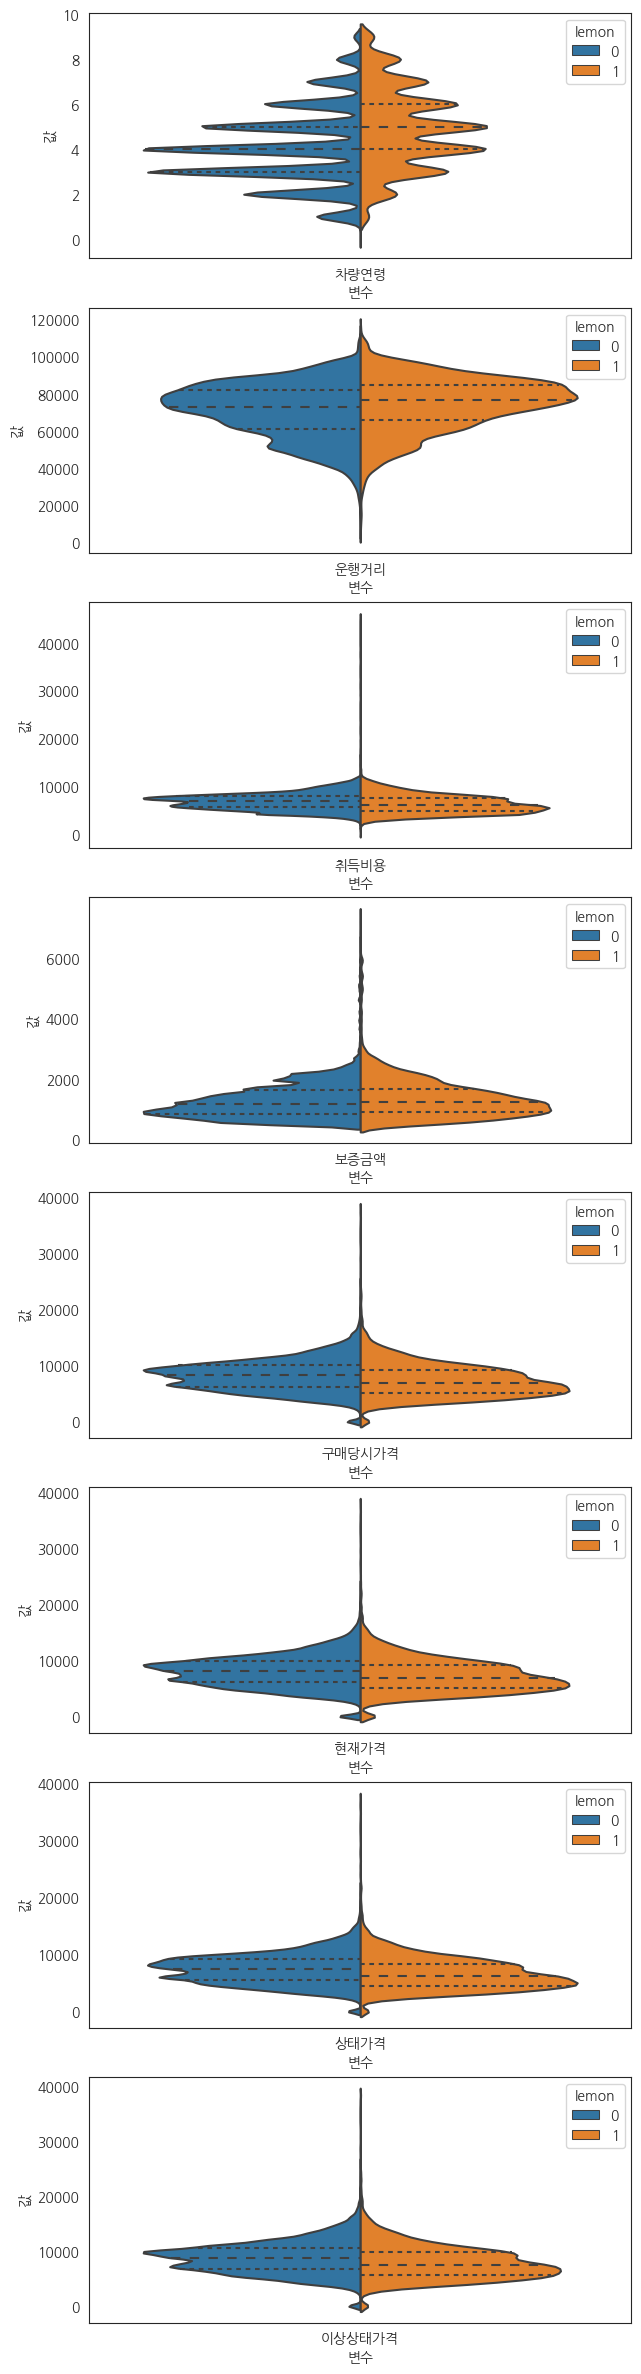

In [1786]:
fig, ax = plt.subplots(nrows=graph_data.변수.nunique(), ncols=1, figsize=(7,30))
for i, a in zip(graph_data.변수.unique(), ax):
    sns.violinplot(x='변수', y='값', hue='lemon', data=graph_data[graph_data.변수==i], ax=a, inner='quartile', split=True)

- box plot

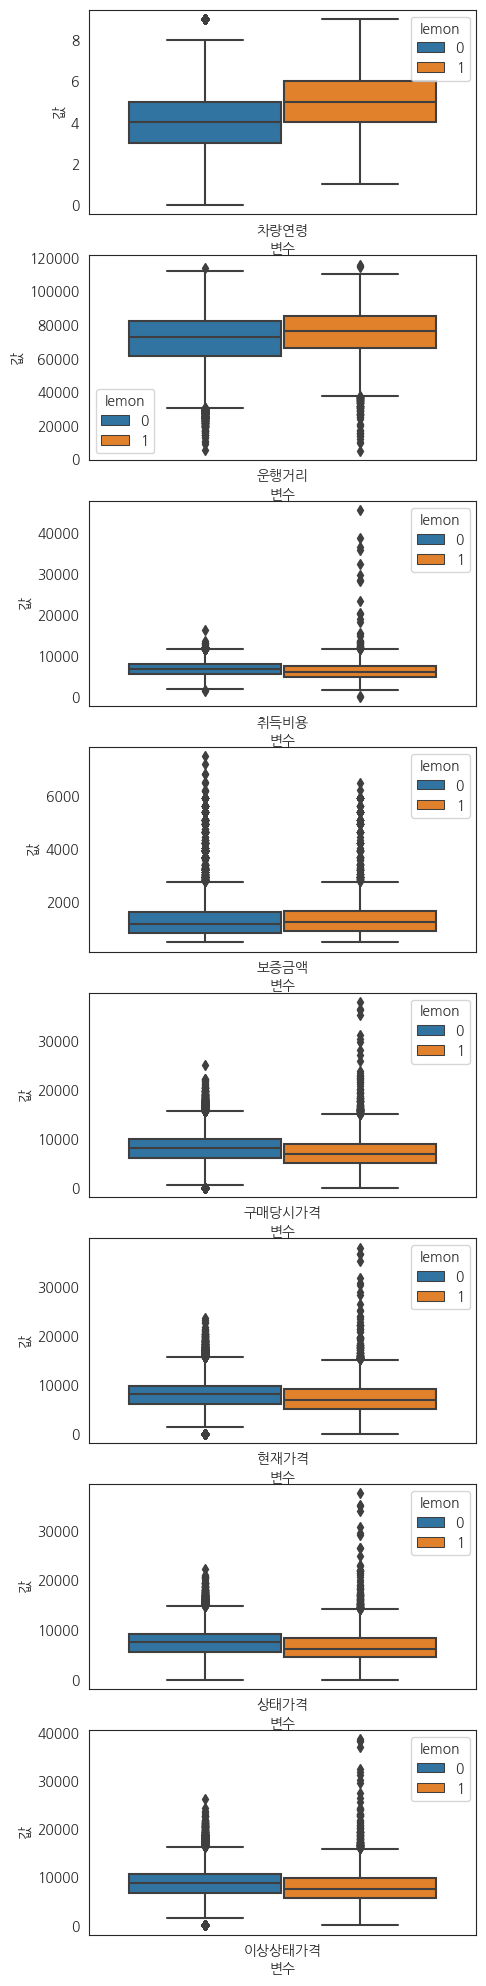

In [1787]:
fig, ax = plt.subplots(nrows=graph_data.변수.nunique(), ncols=1, figsize=(5,25))
for i, a in zip(graph_data.변수.unique(), ax):
    sns.boxplot(x='변수', y='값', hue='lemon', data=graph_data[graph_data.변수==i], ax=a)

- 이상치 처리

In [1788]:
my_df.describe().T

,count,mean,std,min,25%,50%,75%,max
lemon,72983.0,0.122988,0.328425,0.0,0.00,0.00,0.00,1.00
차량연령,72983.0,4.176644,1.712210,0.0,3.00,4.00,5.00,9.00
운행거리,72983.0,71499.995917,14578.913128,4825.0,61837.00,73361.00,82436.00,115717.00
취득비용,72983.0,6730.934326,1767.846435,1.0,5435.00,6700.00,7900.00,45469.00
보증금액,72983.0,1276.580985,598.846788,462.0,837.00,1155.00,1623.00,7498.00
구매당시가격,72983.0,8110.712351,2809.175422,0.0,6070.50,8059.75,9921.50,37992.25
현재가격,72983.0,7962.613544,2862.166002,0.0,5904.00,7958.75,9781.75,37992.25
상태가격,72983.0,7383.305770,2674.747473,0.0,5387.25,7382.50,9187.00,37401.00
이상상태가격,72983.0,8690.020125,2906.617212,0.0,6601.25,8677.00,10508.00,38583.50


In [1789]:
#  '차량연령', '운행거리', 
#  '현재평균상태가격', '현재평균이상상태가격', '현재평균상태소매가격', '현재평균이상상태소매가격', 
#  '취득비용', '보증금액'

# IQR = my_df.차량연령.quantile(0.75) - my_df.차량연령.quantile(0.25)
# u_w = my_df.차량연령.quantile(0.75) + (1.5*IQR) ##upper wisker
# l_w = my_df.차량연령.quantile(0.25) - (1.5*IQR)
# my_df.차량연령 = my_df.차량연령.clip(upper=u_w, lower=l_w) ## 큰 값을 upper wisker값으로 처리됨

IQR = my_df.운행거리.quantile(0.75) - my_df.운행거리.quantile(0.25)
u_w = my_df.운행거리.quantile(0.75) + (1.5*IQR) ##upper wisker
l_w = my_df.운행거리.quantile(0.25) - (1.5*IQR)
my_df.운행거리 = my_df.운행거리.clip(lower=l_w) ## 큰 값을 upper wisker값으로 처리됨
#my_df.운행거리 = my_df.운행거리.clip(upper=u_w, lower=5000) ## 큰 값을 upper wisker값으로 처리됨
#my_df.describe().T

# IQR = my_df.평균상태가격.quantile(0.75) - my_df.평균상태가격.quantile(0.25)
# u_w = my_df.평균상태가격.quantile(0.75) + (1.5*IQR) ##upper wisker
# l_w = my_df.평균상태가격.quantile(0.25) - (1.5*IQR)
# my_df.평균상태가격 = my_df.평균상태가격.clip(upper=u_w) ## 큰 값을 upper wisker값으로 처리됨

# IQR = my_df.평균이상상태가격.quantile(0.75) - my_df.평균이상상태가격.quantile(0.25)
# u_w = my_df.평균이상상태가격.quantile(0.75) + (1.5*IQR) ##upper wisker
# l_w = my_df.평균이상상태가격.quantile(0.25) - (1.5*IQR)
# my_df.평균이상상태가격 = my_df.평균이상상태가격.clip(upper=u_w) ## 큰 값을 upper wisker값으로 처리됨

# IQR = my_df.구매상태가격.quantile(0.75) - my_df.구매상태가격.quantile(0.25)
# u_w = my_df.구매상태가격.quantile(0.75) + (1.5*IQR) ##upper wisker
# l_w = my_df.구매상태가격.quantile(0.25) - (1.5*IQR)
# my_df.구매상태가격 = my_df.구매상태가격.clip(upper=u_w) ## 큰 값을 upper wisker값으로 처리됨

# IQR = my_df.구매이상상태가격.quantile(0.75) - my_df.구매이상상태가격.quantile(0.25)
# u_w = my_df.구매이상상태가격.quantile(0.75) + (1.5*IQR) ##upper wisker
# l_w = my_df.구매이상상태가격.quantile(0.25) - (1.5*IQR)
# my_df.구매이상상태가격 = my_df.구매이상상태가격.clip(upper=u_w) ## 큰 값을 upper wisker값으로 처리됨

IQR = my_df.구매당시가격.quantile(0.75) - my_df.구매당시가격.quantile(0.25)
u_w = my_df.구매당시가격.quantile(0.75) + (1.5*IQR) ##upper wisker
l_w = my_df.구매당시가격.quantile(0.25) - (1.5*IQR)
my_df.구매당시가격 = my_df.구매당시가격.clip(upper=u_w) ## 큰 값을 upper wisker값으로 처리됨

IQR = my_df.현재가격.quantile(0.75) - my_df.현재가격.quantile(0.25)
u_w = my_df.현재가격.quantile(0.75) + (1.5*IQR) ##upper wisker
l_w = my_df.현재가격.quantile(0.25) - (1.5*IQR)
my_df.현재가격 = my_df.현재가격.clip(upper=u_w) ## 큰 값을 upper wisker값으로 처리됨

IQR = my_df.상태가격.quantile(0.75) - my_df.상태가격.quantile(0.25)
u_w = my_df.상태가격.quantile(0.75) + (1.5*IQR) ##upper wisker
l_w = my_df.상태가격.quantile(0.25) - (1.5*IQR)
my_df.상태가격 = my_df.상태가격.clip(upper=u_w) ## 큰 값을 upper wisker값으로 처리됨

IQR = my_df.이상상태가격.quantile(0.75) - my_df.이상상태가격.quantile(0.25)
u_w = my_df.이상상태가격.quantile(0.75) + (1.5*IQR) ##upper wisker
l_w = my_df.이상상태가격.quantile(0.25) - (1.5*IQR)
my_df.이상상태가격 = my_df.이상상태가격.clip(upper=u_w) ## 큰 값을 upper wisker값으로 처리됨

# IQR = my_df.현재평균상태가격.quantile(0.75) - my_df.현재평균상태가격.quantile(0.25)
# u_w = my_df.현재평균상태가격.quantile(0.75) + (1.5*IQR) ##upper wisker
# l_w = my_df.현재평균상태가격.quantile(0.25) - (1.5*IQR)
# my_df.현재평균상태가격 = my_df.현재평균상태가격.clip(upper=u_w, lower=l_w) ## 큰 값을 upper wisker값으로 처리됨

# IQR = my_df.현재평균이상상태가격.quantile(0.75) - my_df.현재평균이상상태가격.quantile(0.25)
# u_w = my_df.현재평균이상상태가격.quantile(0.75) + (1.5*IQR) ##upper wisker
# l_w = my_df.현재평균이상상태가격.quantile(0.25) - (1.5*IQR)
# my_df.현재평균이상상태가격 = my_df.현재평균이상상태가격.clip(upper=u_w, lower=l_w) ## 큰 값을 upper wisker값으로 처리됨

# IQR = my_df.현재평균상태소매가격.quantile(0.75) - my_df.현재평균상태소매가격.quantile(0.25)
# u_w = my_df.현재평균상태소매가격.quantile(0.75) + (1.5*IQR) ##upper wisker
# l_w = my_df.현재평균상태소매가격.quantile(0.25) - (1.5*IQR)
# my_df.현재평균상태소매가격 = my_df.현재평균상태소매가격.clip(upper=u_w, lower=l_w) ## 큰 값을 upper wisker값으로 처리됨

# IQR = my_df.현재평균이상상태소매가격.quantile(0.75) - my_df.현재평균이상상태소매가격.quantile(0.25)
# u_w = my_df.현재평균이상상태소매가격.quantile(0.75) + (1.5*IQR) ##upper wisker
# l_w = my_df.현재평균이상상태소매가격.quantile(0.25) - (1.5*IQR)
# my_df.현재평균이상상태소매가격 = my_df.현재평균이상상태소매가격.clip(upper=u_w, lower=l_w) ## 큰 값을 upper wisker값으로 처리됨

IQR = my_df.취득비용.quantile(0.75) - my_df.취득비용.quantile(0.25)
u_w = my_df.취득비용.quantile(0.75) + (1.5*IQR) ##upper wisker
l_w = my_df.취득비용.quantile(0.25) - (1.5*IQR)
my_df.취득비용 = my_df.취득비용.clip(upper=u_w) ## 큰 값을 upper wisker값으로 처리됨

IQR = my_df.보증금액.quantile(0.75) - my_df.보증금액.quantile(0.25)
u_w = my_df.보증금액.quantile(0.75) + (1.5*IQR) ##upper wisker
l_w = my_df.보증금액.quantile(0.25) - (1.5*IQR)
my_df.보증금액 = my_df.보증금액.clip(upper=u_w) ## 큰 값을 upper wisker값으로 처리됨


/tmp/ipykernel_20525/1207517636.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df.운행거리 = my_df.운행거리.clip(lower=l_w) ## 큰 값을 upper wisker값으로 처리됨
/tmp/ipykernel_20525/1207517636.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df.구매당시가격 = my_df.구매당시가격.clip(upper=u_w) ## 큰 값을 upper wisker값으로 처리됨
/tmp/ipykernel_20525/1207517636.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [1790]:
graph_data = pd.melt(my_df, id_vars='lemon', var_name='변수', value_name='값')
graph_data.head()

,lemon,변수,값
0,0,차량연령,3.0
1,0,차량연령,5.0
2,0,차량연령,4.0
3,0,차량연령,5.0
4,0,차량연령,4.0


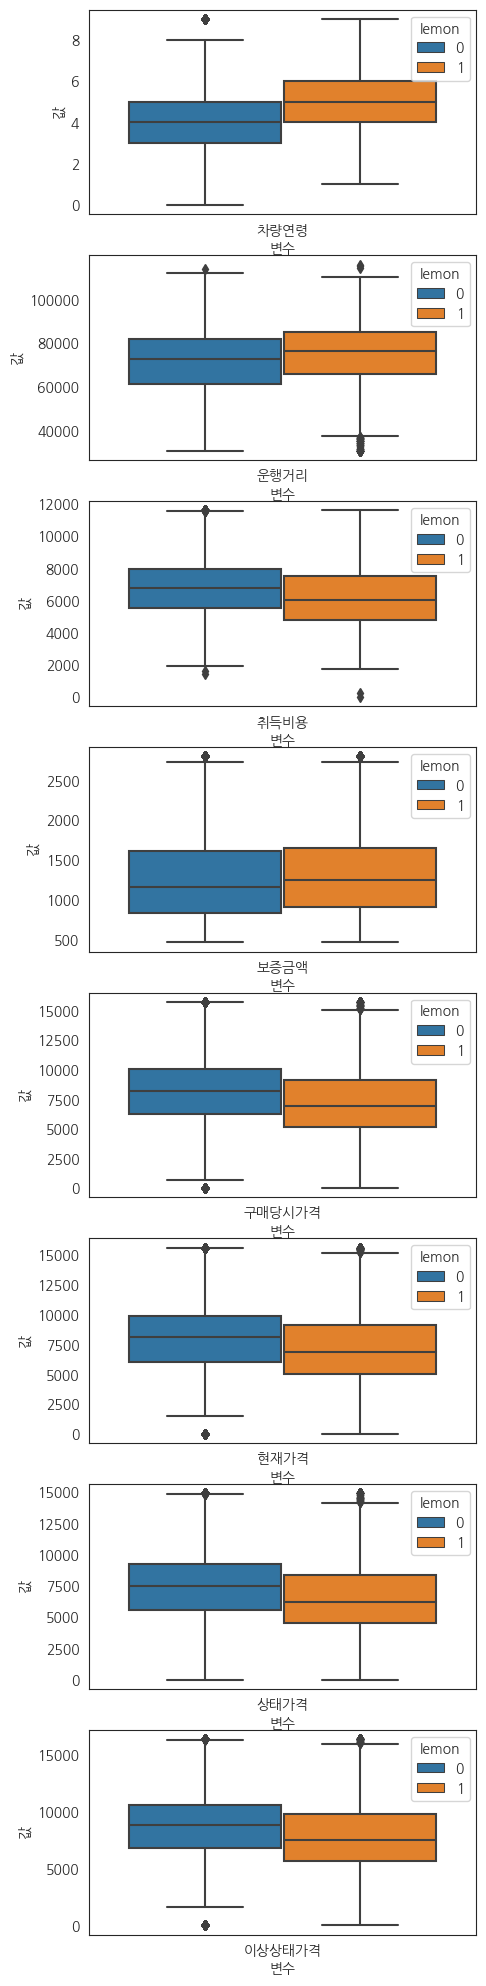

In [1791]:
fig, ax = plt.subplots(nrows=graph_data.변수.nunique(), ncols=1, figsize=(5,25))
for i, a in zip(graph_data.변수.unique(), ax):
    sns.boxplot(x='변수', y='값', hue='lemon', data=graph_data[graph_data.변수==i], ax=a)

In [1792]:
# c = my_df.구매당시평균상태차량가격>100
# c

In [1793]:
# c = my_df.구매당시평균상태차량가격>100
# my_df.구매당시평균상태차량가격 = my_df.구매당시평균상태차량가격.where(c, other=100) #false인 값들을 100으로 바꿈. 이상한 모든 값을 바꿀때
# my_df.describe().T

In [1794]:
my_df.info()
lemon['차량연령'] = my_df['차량연령']
lemon['운행거리'] = my_df['운행거리']
# lemon['현재평균상태가격'] = my_df['현재평균상태가격']
# lemon['현재평균이상상태가격'] = my_df['현재평균이상상태가격']
# lemon['현재평균상태소매가격'] = my_df['현재평균상태소매가격']
# lemon['현재평균이상상태소매가격'] = my_df['현재평균이상상태소매가격']

# lemon['평균상태가격'] = my_df['평균상태가격']
# lemon['평균이상상태가격'] = my_df['평균이상상태가격']

# lemon['구매상태가격'] = my_df['구매상태가격']
# lemon['구매이상상태가격'] = my_df['구매이상상태가격']

lemon['구매당시가격'] = my_df['구매당시가격']
lemon['현재가격'] = my_df['현재가격']
lemon['상태가격'] = my_df['상태가격']
lemon['이상상태가격'] = my_df['이상상태가격']

lemon['취득비용'] = my_df['취득비용']
lemon['보증금액'] = my_df['보증금액']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lemon   72983 non-null  int64  
 1   차량연령    72983 non-null  int64  
 2   운행거리    72983 non-null  float64
 3   취득비용    72983 non-null  float64
 4   보증금액    72983 non-null  int64  
 5   구매당시가격  72983 non-null  float64
 6   현재가격    72983 non-null  float64
 7   상태가격    72983 non-null  float64
 8   이상상태가격  72983 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 7.6 MB


In [1795]:
col = ['구매당시평균상태차량가격', '구매당시평균이상상태차량가격', '구매당시평균상태소매가격', '구매당시평균이상상태소매가격', '현재평균상태가격', '현재평균이상상태가격', '현재평균상태소매가격', '현재평균이상상태소매가격']
lemon = lemon.drop(columns=col)
lemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lemon           72983 non-null  int64  
 1   구매일자            72983 non-null  int64  
 2   차량연령            72983 non-null  int64  
 3   운행거리            72983 non-null  float64
 4   취득비용            72983 non-null  float64
 5   온라인판매여부         72983 non-null  int64  
 6   보증금액            72983 non-null  int64  
 7   구매년             72983 non-null  int64  
 8   구매월             72983 non-null  int64  
 9   구매분기            72983 non-null  int64  
 10  ADESA           72983 non-null  int64  
 11  OTHER           72983 non-null  int64  
 12  MANHEIM         72983 non-null  int64  
 13  Alloy           72983 non-null  int64  
 14  Covers          72983 non-null  int64  
 15  OTHERS          72983 non-null  int64  
 16  Special         72983 non-null  int64  
 17  AMERICAN        72983 non-null 

In [1796]:
lemon.tail()

,lemon,구매일자,차량연령,운행거리,취득비용,온라인판매여부,보증금액,구매년,구매월,구매분기,...,제조사_bin06,모델명,구매자ID,구매지우편번호,무채색여부,Auto여부,구매당시가격,현재가격,상태가격,이상상태가격
ID,,,,,,,,,,,,,,,,,,,,,
73010,1,2,8,45234.0,4200.0,0,993,2009,12,4,...,0,0.185485,0.134747,0.115977,1,1,4004.50,2844.25,2919.50,3929.25
73011,0,2,2,71759.0,6200.0,0,1038,2009,12,4,...,1,0.061270,0.088539,0.115977,1,1,9180.00,7396.25,7696.25,8880.00
73012,0,2,4,88500.0,8200.0,0,1893,2009,12,4,...,1,0.145910,0.134747,0.115977,1,1,11102.50,9872.25,9620.00,11354.75
73013,0,2,3,79554.0,7000.0,0,1974,2009,12,4,...,1,0.079919,0.088539,0.115977,1,1,8900.25,7542.50,7635.75,8807.00
73014,0,2,3,66855.0,8000.0,0,1313,2009,12,4,...,1,0.187516,0.134747,0.115977,1,1,10508.00,8729.25,8964.25,10273.00


In [1797]:
target = lemon.lemon
churn = lemon.drop(columns='lemon')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(churn, target, test_size=0.3, stratify=target)

In [1798]:
import xgboost as XGB # Native XGB
from xgboost import XGBClassifier # Sklearn-Wrapper
from xgboost import XGBRegressor

In [1799]:
xgb = XGBClassifier(n_estimators=300, objective='binary:logistic',
                    learning_rate=0.01, max_depth=6)
evals = [(x_test, y_test)]

In [1800]:
xgb.fit(x_train, y_train, eval_metric='auc', eval_set=evals, early_stopping_rounds=100)

[0]	validation_0-auc:0.74743


/home/hwi/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/hwi/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.74976
[2]	validation_0-auc:0.75039
[3]	validation_0-auc:0.75064
[4]	validation_0-auc:0.75063
[5]	validation_0-auc:0.75114
[6]	validation_0-auc:0.75120
[7]	validation_0-auc:0.75111
[8]	validation_0-auc:0.75140
[9]	validation_0-auc:0.75177
[10]	validation_0-auc:0.75252
[11]	validation_0-auc:0.75236
[12]	validation_0-auc:0.75251
[13]	validation_0-auc:0.75267
[14]	validation_0-auc:0.75251
[15]	validation_0-auc:0.75265
[16]	validation_0-auc:0.75277
[17]	validation_0-auc:0.75295
[18]	validation_0-auc:0.75311
[19]	validation_0-auc:0.75291
[20]	validation_0-auc:0.75305
[21]	validation_0-auc:0.75980
[22]	validation_0-auc:0.75969
[23]	validation_0-auc:0.76384
[24]	validation_0-auc:0.76523
[25]	validation_0-auc:0.76578
[26]	validation_0-auc:0.76578
[27]	validation_0-auc:0.76602
[28]	validation_0-auc:0.76695
[29]	validation_0-auc:0.76709
[30]	validation_0-auc:0.76794
[31]	validation_0-auc:0.76868
[32]	validation_0-auc:0.76896
[33]	validation_0-auc:0.76994
[34]	validation_0-a

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [1801]:
pred = xgb.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred)

0.7861400863638531

In [1802]:
xgb.feature_importances_

array([0.00761739, 0.06211127, 0.0172359 , 0.01936772, 0.00701394,
       0.00965857, 0.02556853, 0.01060783, 0.        , 0.02410873,
       0.01069966, 0.07268041, 0.20710911, 0.11362922, 0.        ,
       0.13047501, 0.01083131, 0.        , 0.        , 0.04609716,
       0.        , 0.        , 0.        , 0.        , 0.00455665,
       0.00637811, 0.00693825, 0.01233399, 0.00558537, 0.08602857,
       0.02172087, 0.02773266, 0.0050469 , 0.0081027 , 0.01112398,
       0.00965159, 0.01074813, 0.00924041], dtype=float32)

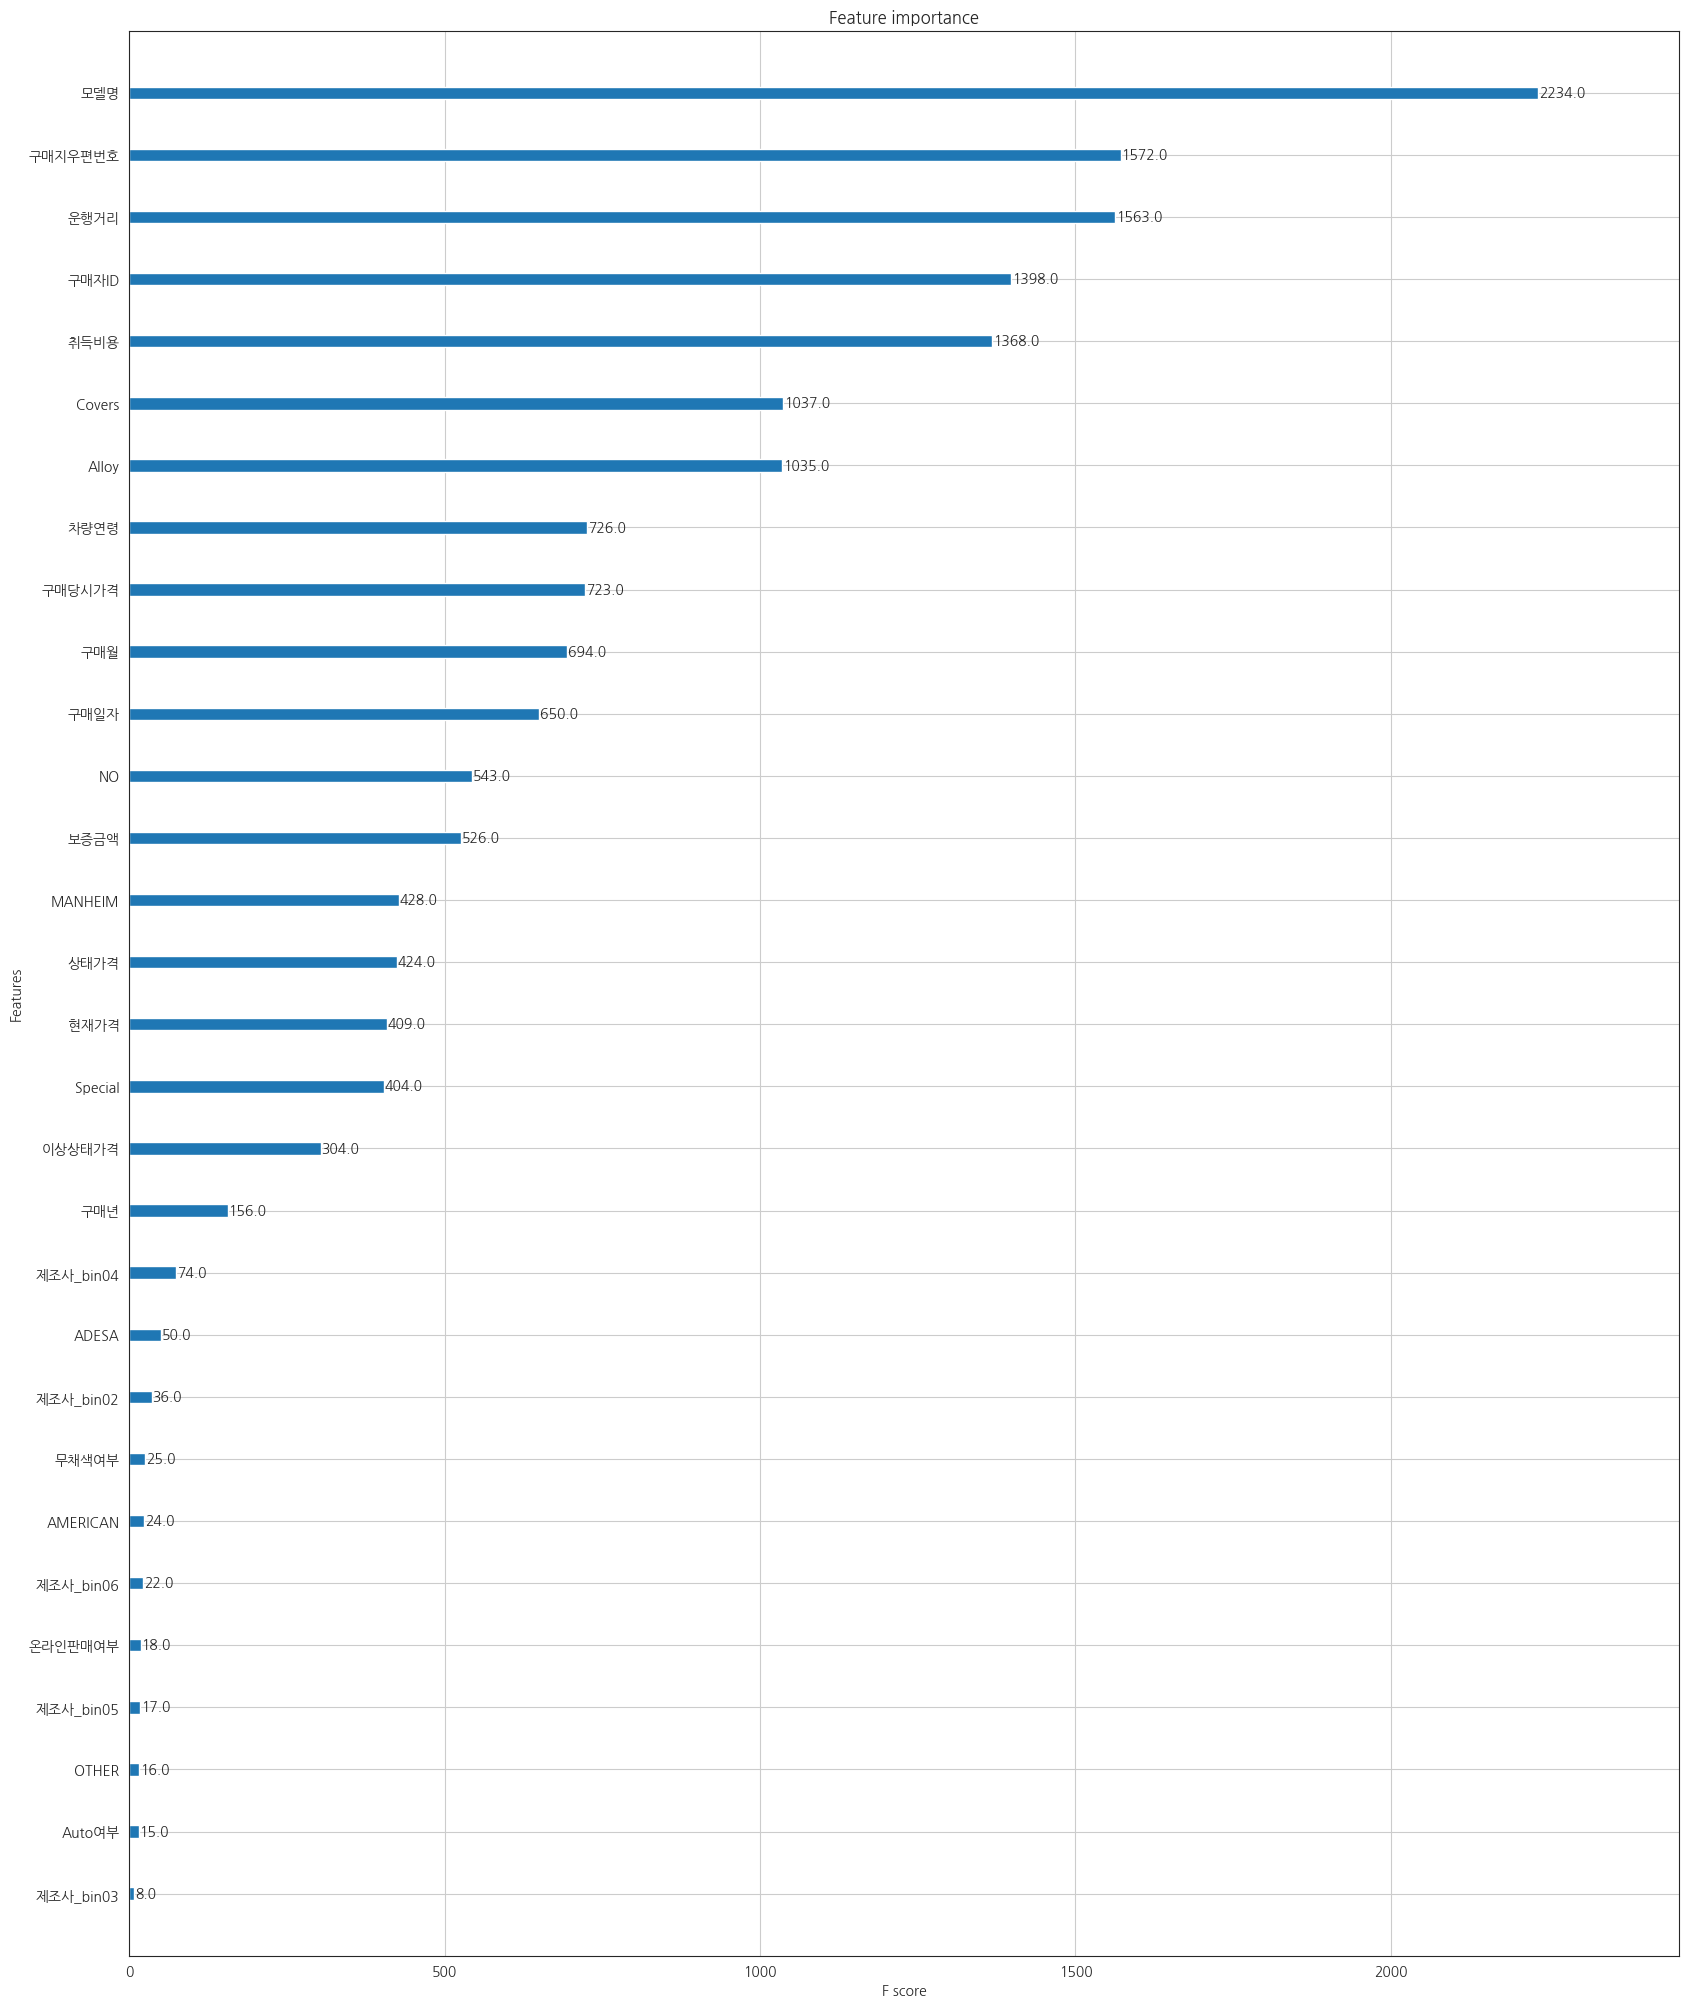

In [1803]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(20,25))
plot_importance(xgb, ax=ax);

In [1804]:
lemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lemon           72983 non-null  int64  
 1   구매일자            72983 non-null  int64  
 2   차량연령            72983 non-null  int64  
 3   운행거리            72983 non-null  float64
 4   취득비용            72983 non-null  float64
 5   온라인판매여부         72983 non-null  int64  
 6   보증금액            72983 non-null  int64  
 7   구매년             72983 non-null  int64  
 8   구매월             72983 non-null  int64  
 9   구매분기            72983 non-null  int64  
 10  ADESA           72983 non-null  int64  
 11  OTHER           72983 non-null  int64  
 12  MANHEIM         72983 non-null  int64  
 13  Alloy           72983 non-null  int64  
 14  Covers          72983 non-null  int64  
 15  OTHERS          72983 non-null  int64  
 16  Special         72983 non-null  int64  
 17  AMERICAN        72983 non-null 

In [1806]:
lemon.to_csv("lemon_com.csv")